<a href="https://colab.research.google.com/github/51stDimension/EDAExperiments/blob/main/Experiment%207/EXP7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 

%matplotlib inline 

**Now we will write a code to plot the SVC plot of the Support Vector machine**

In [ ]:
def plot_svc(svc, X, y, h=0.02, pad=0.25): 
  x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad 
  y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad 
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max)) 
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]) 
  Z = Z.reshape(xx.shape) 
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)  
  plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
  # Support vectors indicated in plot by vertical lines 
  sv = svc.support_vectors_ 
  plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1') 
  plt.xlim(x_min, x_max) 
  plt.ylim(y_min, y_max) 
  plt.xlabel('X1') 
  plt.ylabel('X2') 
  plt.show() 
  print('Number of support vectors: ', svc.support_.size)

**Generating randomized data to run the SVM analyzer on it so that the point can be classified.**

In [ ]:
np.random.seed(123) 
X = np.random.randn(20,2) 
y = np.repeat([1,-1], 10) 
 
X[y == -1] = X[y == -1] +1

Text(0, 0.5, 'X2')

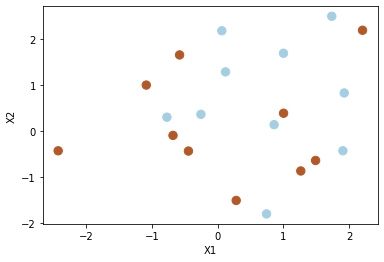

In [ ]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1') 
plt.ylabel('X2')

# Support Vector Classifier

The  SVC()  function can be used to fit a support vector classifier when the argument  kernel="linear"  is used. This function uses a slightly different formulation of the equations we saw in lecture to build the support vector classifier. The  c  argument allows us to specify the cost of a violation to the margin. When the  c  argument is small, then the margins will be wide and many support vectors will be on the margin or will violate the margin. When the  c  argument is large, then the margins will be narrow and there will be few support vectors on the margin or violating the margin.

We can use the  SVC()  function to fit the support vector classifier for a given value of the  cost  parameter. Here we demonstrate the use of this function on a two-dimensional example so that we can plot the resulting decision boundary. Let's start by generating a set of observations, which belong to two classes:

In [ ]:
svc = SVC(C=1, kernel='linear') 
svc.fit(X, y)

SVC(C=1, kernel='linear')

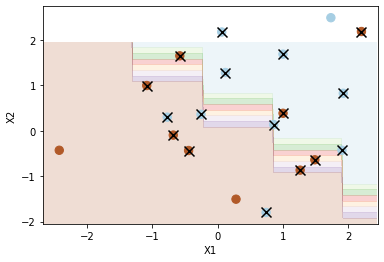

Number of support vectors:  17


In [ ]:
plot_svc(svc, X, y)

The region of feature space that will be assigned to the −1 class is shown in light blue, and the region that will be assigned to the +1 class is shown in brown. The decision boundary between the two classes is linear (because we used the argument  kernel="linear" ).

**Q: What is the number of support vectors?**

The total number of support vectors is equal to 19

The support vectors are plotted with crosses and the remaining observations are plotted as circles; we see here that there are 13 support vectors. We can determine their identities as follows:

In [ ]:
svc.support_

array([11, 12, 13, 14, 15, 16, 17, 18, 19,  0,  2,  4,  5,  6,  7,  8,  9],
      dtype=int32)

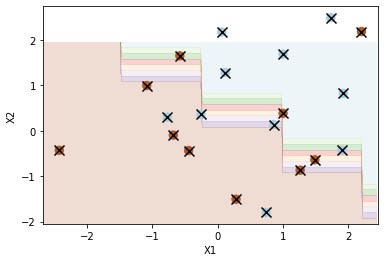

Number of support vectors:  20


In [ ]:
svc2 = SVC(C=0.1, kernel='linear') 
svc2.fit(X, y) 
plot_svc(svc2, X, y)

**Q: What is the number of support vectors?**

Now we have 20 support vectors as we have decreased the C parameter value.

Now that a smaller value of the  c  parameter is being used, we obtain a larger number of support vectors, because the margin is now wider.

The  sklearn.grid_search  module includes a a function  GridSearchCV()  to perform cross-validation. In order to use this function, we pass in relevant information about the set of models that are under consideration. The following command indicates that we want perform 10-fold cross-validation to compare SVMs with a linear kernel, using a range of values of the cost parameter:

In [ ]:
from sklearn.model_selection import GridSearchCV 
 
# Select the optimal C parameter by cross-validation 
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}] 
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10)
scoring= clf.fit(X, y)

In [ ]:
clf.best_params_ 

{'C': 5}

**Q: What is the value of best parameter C?**

We can see that we get the best value for hyperparameter C as 5

As usual, the  predict()  function can be used to predict the class label on a set of test observations, at any given value of the cost parameter. Let's generate a test data set:

In [ ]:
np.random.seed(1) 
X_test =  np.random.randn(20,2) 
y_test = np.random.choice([-1,1], 20) 
X_test[y_test == 1] = X_test[y_test == 1] -1 

In [ ]:
svc2 = SVC(C=5, kernel='rbf') 

In [ ]:
svc2.fit(X, y) 
y_pred = svc2.predict(X_test) 

In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,2,10


Looking at the confusion matrix we can say that 12 of them were correctly identified when we used the best parameter which is c=5

Now consider a situation in which the two classes are linearly separable. Then we can find a separating hyperplane using the  svm()  function. First we'll give our simulated data a little nudge so that they are linearly separable:

Text(0, 0.5, 'X2')

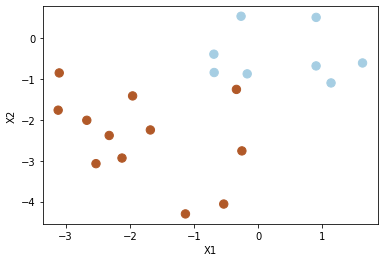

In [ ]:
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Now the observations are just barely linearly separable. We fit the support vector classifier and plot the resulting hyperplane, using a very large value of  cost  so that no observations are misclassified.

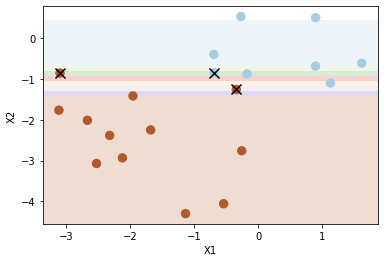

Number of support vectors:  3


In [ ]:
svc3 = SVC(C=1e5, kernel='linear')
svc3.fit(X_test, y_test)
plot_svc(svc3, X_test, y_test)

**Q: What is the number of support vectors?**

3

No training errors were made and only three support vectors were used. However, we can see from the figure that the margin is very narrow (because the observations that are not support vectors, indicated as circles, are very close to the decision boundary). It seems likely that this model will perform poorly on test data. Let's try a smaller value of  cost :

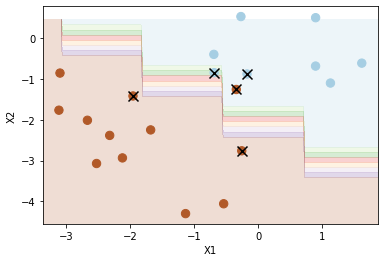

Number of support vectors:  5


In [ ]:
svc4 = SVC(C=1, kernel='linear')
svc4.fit(X_test, y_test)
plot_svc(svc4, X_test, y_test)

**Q: What is the number of support vectors?**

5

Using  cost=1 , we misclassify a training observation, but we also obtain a much wider margin and make use of five support vectors. It seems likely that this model will perform better on test data than the model with  cost=1e5 .

# Support Vector Machine 

In order to fit an SVM using a non-linear kernel, we once again use the  SVC()  function. However, now we use a different value of the parameter kernel. To fit an SVM with a polynomial kernel we use  kernel="poly" , and to fit an SVM with a radial kernel we use  kernel="rbf" . In the former case we also use the  degree  argument to specify a degree for the polynomial kernel, and in the latter case we use  gamma  to specify a value of  γ  for the radial basis kernel.

Let's generate some data with a non-linear class boundary:

Text(0, 0.5, 'X2')

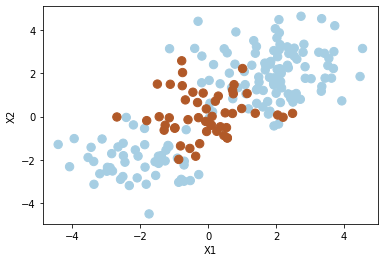

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

See how one class is kind of stuck in the middle of another class? This suggests that we might want to use a radial kernel in our SVM. Now let's fit the training data using the  SVC()  function with a radial kernel and  γ=1 :

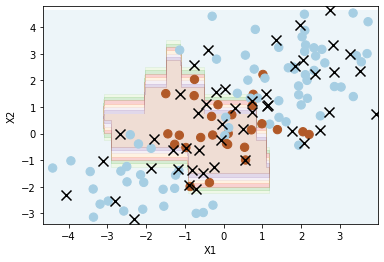

Number of support vectors:  51


In [ ]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

**Q: What is the number of support vectors?**

51

Not too shabby! The plot shows that the resulting SVM has a decidedly non-linear boundary. We can see from the figure that there are a fair number of training errors in this SVM fit. If we increase the value of cost, we can reduce the number of training errors:

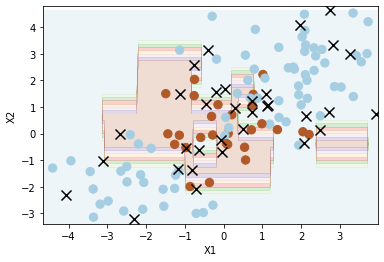

Number of support vectors:  36


In [ ]:
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

**Q: What is the number of support vectors?**

36

However, this comes at the price of a more irregular decision boundary that seems to be at risk of overfitting the data. We can perform cross-validation using  GridSearchCV()  to select the best choice of  γ  and cost for an SVM with a radial kernel:

In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'C': 10, 'gamma': 0.5}

Therefore, the best choice of parameters involves  cost=10  and  gamma=0.5 . We can plot the resulting fit using the  plot_svc()  function, and view the test set predictions for this model by applying the  predict()  function to the test data:

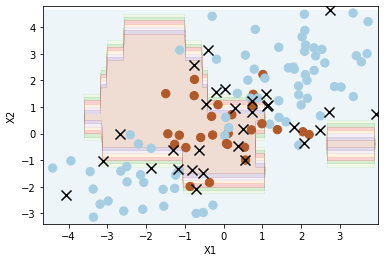

Number of support vectors:  32
[[66  7]
 [ 6 21]]
0.87


In [ ]:
plot_svc(clf.best_estimator_, X_test, y_test)
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)))
print(clf.best_estimator_.score(X_test, y_test))

**Q: What is the number of support vectors?**

32

Analysing the above results:

We had a total of 32 support vectors
From the total of 100 observations we can see that 87 of them were correctly classifier giving a accuracy of 87%. That means the parameter did quite well.



---



In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [ ]:
# More constrained model
svm3 = SVC(C=1, kernel='rbf', gamma=1)
svm3.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [ ]:
# More flexible model
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=1, gamma=50)

SVMs and support vector classifiers output class labels for each observation. However, it is also possible to obtain fitted values for each observation, which are the numerical scores used to obtain the class labels.

In essence, the sign of the fitted value determines on which side of the decision boundary the observation lies. Therefore, the relationship between the fitted value and the class prediction for a given observation is simple: if the fitted value exceeds zero then the observation is assigned to one class, and if it is less than zero than it is assigned to the other.

In order to obtain the fitted values for a given SVM model fit, we use the  .decision_function()  method of the SVC:

In [ ]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

Now we can produce the ROC plot to see how the models perform on both the training and the test data:

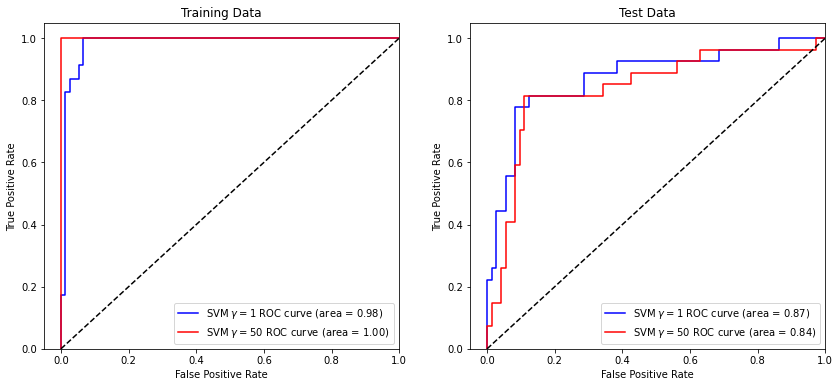

In [ ]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

## Analysis of ROC

If we look at the theory of analysis of ROC curves:
The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR).

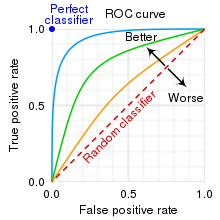

We can see that in the training data our classifier almost acted as a perfect classifier and in the case of testing data our classifier also performed quite well as it was well above the 45 degree line of random classififer.